## 1 Fashion Mnist Data set Downloading
A. Download the Fashion_MNIST dataset. You can find it on the official Fashion-MNIST website or by using PyTorch's torchvision.datasets module. Split the dataset into training, validation and testing sets. A common split is 80% of the data to train, 10% to validate, and 10% to test scenarios, but you can adjust this as needed.
B .Normalize the images. This involves scaling the pixel values to a range between 0 and 1.
## 2 Implement a MLP for classification.
C. Flatten the images into a single dimensional vector before feeding it to the model.
D. Write a pre-processing module for all the images.
E. Write the Forward pass from scratch. Use of the inbuilt forward pass function will
result in 0 marks for this sub-question.
F. Write the Backward pass from scratch. Use the inbuilt back propagation function will result in 0 marks for this sub-question
G. Write the module for cross entropy loss
H. Experiment with different hyperparameters like number of layers, dropout,
objective function, etc. and settle with a combination which performs the best for the given problem.

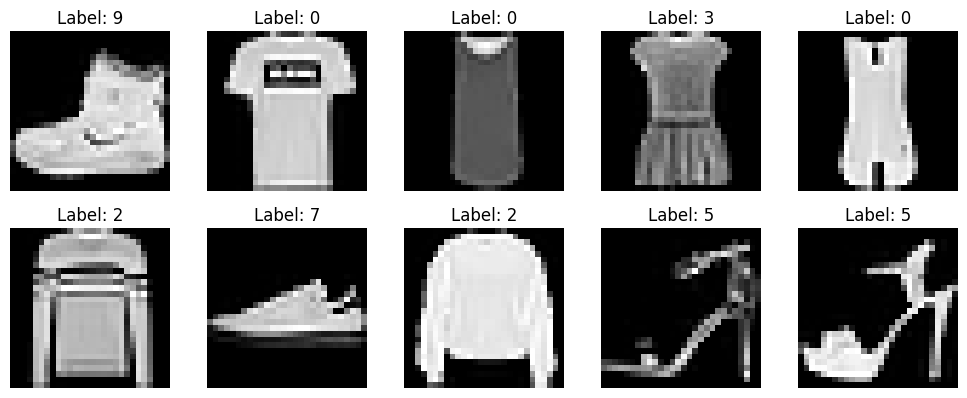

Training set size: 48000
Validation set size: 12000
Test set size: 10000
Epoch 1, Training Loss: 1.1882, Validation Loss: 0.7100, Training Accuracy: 0.6229, Validation Accuracy: 0.7457
Epoch 2, Training Loss: 0.6240, Validation Loss: 0.5772, Training Accuracy: 0.7737, Validation Accuracy: 0.7931
Epoch 3, Training Loss: 0.5395, Validation Loss: 0.5200, Training Accuracy: 0.8076, Validation Accuracy: 0.8180
Epoch 4, Training Loss: 0.4960, Validation Loss: 0.4893, Training Accuracy: 0.8245, Validation Accuracy: 0.8272
Epoch 5, Training Loss: 0.4691, Validation Loss: 0.4650, Training Accuracy: 0.8337, Validation Accuracy: 0.8356
Epoch 6, Training Loss: 0.4497, Validation Loss: 0.4552, Training Accuracy: 0.8415, Validation Accuracy: 0.8386
Epoch 7, Training Loss: 0.4345, Validation Loss: 0.4451, Training Accuracy: 0.8465, Validation Accuracy: 0.8413
Epoch 8, Training Loss: 0.4222, Validation Loss: 0.4292, Training Accuracy: 0.8511, Validation Accuracy: 0.8477
Epoch 9, Training Loss: 0.4116,

In [ ]:
#Import all the modules
import numpy as np
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Downloading the Fashion_MNIST dataset
dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Display a few sample images with their labels
def show_sample_images(dataset, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        image, label = dataset[i]
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_images(dataset)

# 80-20 split for training and validation sets
train_length = int(0.8 * len(dataset))
val_length = len(dataset) - train_length

# Split the dataset
train_dataset, val_dataset = random_split(dataset, [train_length, val_length])

# PyTorch DataLoaders for each set
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Checking the dataset sizes
print(f'Training set size: {len(train_dataset)}')  # Should be 80% of 60,000
print(f'Validation set size: {len(val_dataset)}')  # Should be 20% of 60,000
print(f'Test set size: {len(test_dataset)}')       # Should be 10,000

class MLP_FM:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initializing weights and biases adding small noise to the dataset
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    #Relu function for Inner layers
    def relu(self, Z):
        return np.maximum(0, Z)

    #Softmax for the output layer
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return expZ / np.sum(expZ, axis=1, keepdims=True)

    #Forward Function from scratch
    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        A2 = self.softmax(self.Z2)
        return A2

    #Backward Function
    def backward(self, X, y, output):
        m = y.shape[0]
        y_one_hot = np.eye(self.output_size)[y]

        dZ2 = output - y_one_hot
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * (self.Z1 > 0)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    #Loss Function - Cross entropy loss
    def compute_loss(self, output, y):
        m = y.shape[0]
        y_one_hot = np.eye(self.output_size)[y]
        log_probs = -np.log(output[range(m), y])
        loss = np.sum(log_probs) / m
        return loss

    # predict function
    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

    # Defining accuracy function
    def accuracy(self, predictions, labels):
        return np.mean(predictions == labels)

# Flatenig the image 28*28
def flatten_images(images):
    return images.view(images.size(0), -1).numpy()


# Training with lr = 0.01 for epoch 35
def train_mlp(model, train_loader, val_loader, epochs=35, learning_rate=0.01):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        model_train_loss = 0
        model_train_acc = 0
        for batch in train_loader:
            images, labels = batch
            images = flatten_images(images)
            labels = labels.numpy()

            outputs = model.forward(images)
            loss = model.compute_loss(outputs, labels)
            model_train_loss += loss
            model_train_acc += model.accuracy(model.predict(images), labels)

            model.backward(images, labels, outputs)

        model_train_loss /= len(train_loader)
        model_train_acc /= len(train_loader)
        train_losses.append(model_train_loss)
        train_accuracies.append(model_train_acc)

        val_loss = 0
        val_acc = 0
        for batch in val_loader:
            images, labels = batch
            images = flatten_images(images)
            labels = labels.numpy()

            outputs = model.forward(images)
            loss = model.compute_loss(outputs, labels)
            val_loss += loss
            val_acc += model.accuracy(model.predict(images), labels)

        val_loss /= len(val_loader)
        val_acc /= len(val_loader)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f'Epoch {epoch+1}, Training Loss: {model_train_loss:.4f}, Validation Loss: {val_loss:.4f}, Training Accuracy: {model_train_acc:.4f}, Validation Accuracy: {val_acc:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, data_loader):
    all_labels = []
    all_predictions = []
    total_loss = 0
    for batch in data_loader:
        images, labels = batch
        images = flatten_images(images)
        labels = labels.numpy()
        outputs = model.forward(images)
        loss = model.compute_loss(outputs, labels)
        total_loss += loss
        predictions = model.predict(images)
        all_labels.extend(labels)
        all_predictions.extend(predictions)
    total_loss /= len(data_loader)
    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions)
    accuracy = model.accuracy(all_predictions, all_labels)
    report = classification_report(all_labels, all_predictions, output_dict=True)
    return total_loss, accuracy, report

# Data Input with one hidden performs better
input_size = 28 * 28
hidden_size = 128  # Single hidden layer with 128 units
output_size = 10
mlp_model = MLP_FM(input_size, hidden_size, output_size, learning_rate=0.01)

train_losses, val_losses, train_accuracies, val_accuracies = train_mlp(mlp_model, train_loader, val_loader, epochs=50, learning_rate=0.01)



#### MLP module - Plots and Visualizations

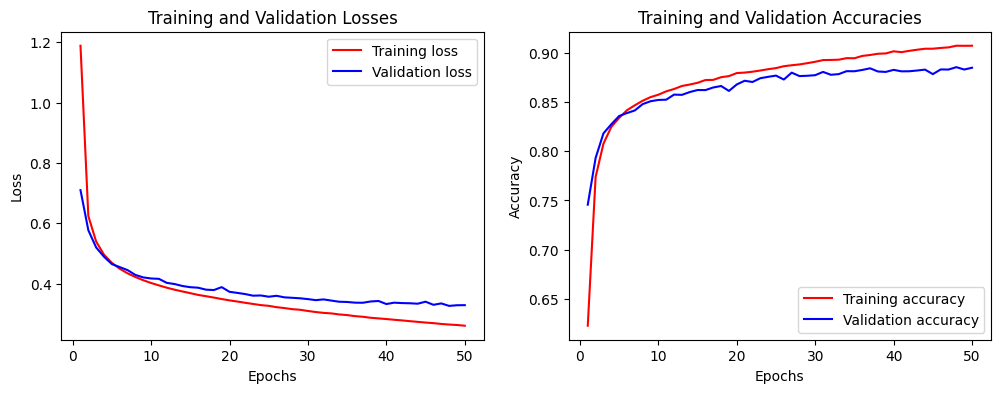

Test Loss: 0.3504, Test Accuracy: 0.8776


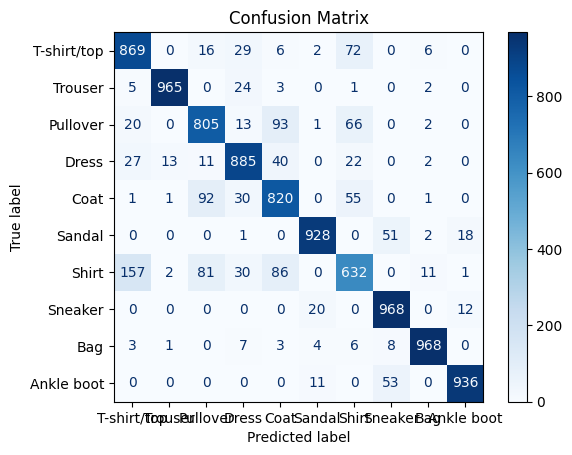

Classification Report on Test Data:
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.87      0.83      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.80      0.81      0.80      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.78      0.82      0.80      1000
      Sandal       0.96      0.93      0.94      1000
       Shirt       0.74      0.63      0.68      1000
     Sneaker       0.90      0.97      0.93      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Percentage difference in accuracy between training and test data: 0.49%
Percentage difference in accuracy between validation and test data: 1.49%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from torchvision import datasets, transforms

# Define the class names for the Fashion-MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to flatten images
def flatten_images(images):
    return images.view(images.size(0), -1).numpy()

# Plotting the losses and accuracies
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'r', label='Training loss')
    plt.plot(epochs, val_losses, 'b', label='Validation loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'r', label='Training accuracy')
    plt.plot(epochs, val_accuracies, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Plot metrics
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Evaluate the MLP model on the test dataset
def evaluate_mlp(model, data_loader):
    all_labels = []
    all_predictions = []
    total_loss = 0

    for batch in data_loader:
        images, labels = batch
        images = flatten_images(images)
        labels = labels.numpy()
        outputs = model.forward(images)
        loss = model.compute_loss(outputs, labels)
        total_loss += loss
        predictions = model.predict(images)
        all_labels.extend(labels)
        all_predictions.extend(predictions)

    total_loss /= len(data_loader)
    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions)
    accuracy = model.accuracy(all_predictions, all_labels)
    return total_loss, accuracy, all_labels, all_predictions

# Evaluate the model on the test dataset
test_loss, test_acc, y_true_test, y_pred_test = evaluate_mlp(mlp_model, test_loader)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_true_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report on Test Data:")
print(classification_report(y_true_test, y_pred_test, target_names=class_names))

# Calculate percentage difference in accuracy
percentage_difference_train_test = abs(np.mean(train_accuracies) - test_acc) / np.mean(train_accuracies) * 100
percentage_difference_val_test = abs(np.mean(val_accuracies) - test_acc) / np.mean(val_accuracies) * 100
print(f'Percentage difference in accuracy between training and test data: {percentage_difference_train_test:.2f}%')
print(f'Percentage difference in accuracy between validation and test data: {percentage_difference_val_test:.2f}%')




#3 CNN module



CNN Model Definition:Requirements

A.  a CNN model with 5 convolutional layers, ReLU activations, max pooling, and dropout layers.
B. We have Initialized the model weights using He initialization after experimentiong with all weights Xavier, random and He.

C. Training the Model: defined a function to train the model, including forward pass, loss computation, backpropagation, and weight updates.[ These are all inbuilt functions]
D. Trained the model and plotted the training and validation losses and accuracies.
E. Evaluating the Model:
F. Defined a function to evaluate the model on the test dataset.
G. Computesd test loss and accuracy, and generated the predictions for the test data.
E. plots && the confusion matrix and classification report for detailed evaluation.



100%|██████████| 26421880/26421880 [00:03<00:00, 8236646.76it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 359113.04it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6269767.53it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 676937.55it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Training set size: 48000
Validation set size: 12000
Test set size: 10000


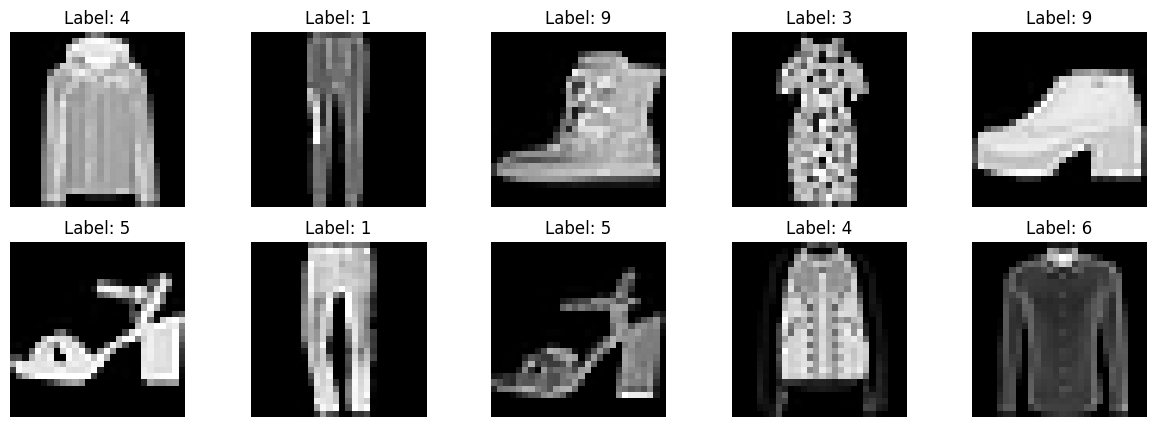

Epoch 1, Training Loss: 0.6791, Validation Loss: 0.3874, Training Accuracy: 0.7584, Validation Accuracy: 0.8564
Epoch 2, Training Loss: 0.4051, Validation Loss: 0.3151, Training Accuracy: 0.8558, Validation Accuracy: 0.8833
Epoch 3, Training Loss: 0.3403, Validation Loss: 0.2670, Training Accuracy: 0.8774, Validation Accuracy: 0.9023
Epoch 4, Training Loss: 0.2973, Validation Loss: 0.2585, Training Accuracy: 0.8928, Validation Accuracy: 0.9062
Epoch 5, Training Loss: 0.2726, Validation Loss: 0.2550, Training Accuracy: 0.9029, Validation Accuracy: 0.9039
Epoch 6, Training Loss: 0.2562, Validation Loss: 0.2265, Training Accuracy: 0.9079, Validation Accuracy: 0.9170
Epoch 7, Training Loss: 0.2347, Validation Loss: 0.2317, Training Accuracy: 0.9159, Validation Accuracy: 0.9155
Epoch 8, Training Loss: 0.2238, Validation Loss: 0.2291, Training Accuracy: 0.9182, Validation Accuracy: 0.9180
Epoch 9, Training Loss: 0.2102, Validation Loss: 0.2237, Training Accuracy: 0.9225, Validation Accuracy:

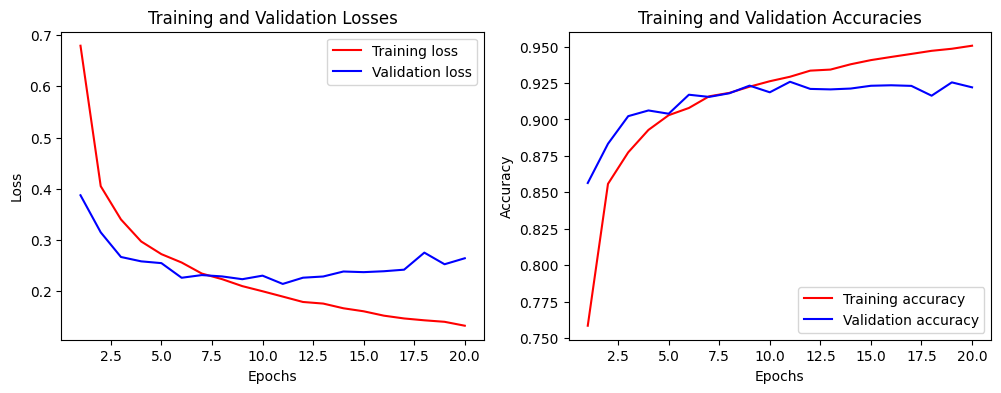

Test Loss: 0.2877, Test Accuracy: 0.9180


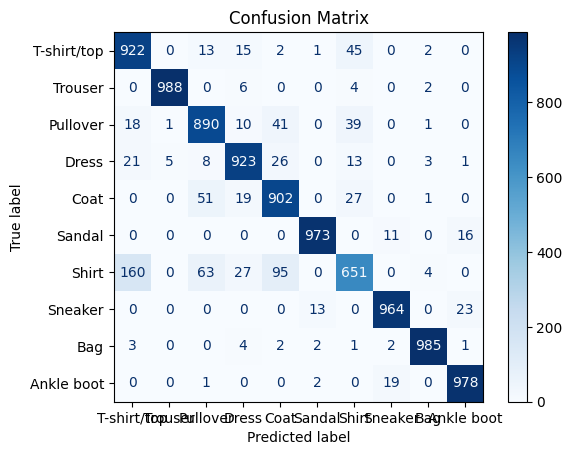

Classification Report on Test Data:
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.92      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.87      0.89      0.88      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.84      0.90      0.87      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.83      0.65      0.73      1000
     Sneaker       0.97      0.96      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Percentage difference in accuracy between training and test data: 0.39%
Train features shape: torch.Size([48000, 128])
Validation features shape: torch.Size([12000, 128])
Test features shape: torch.Size([1

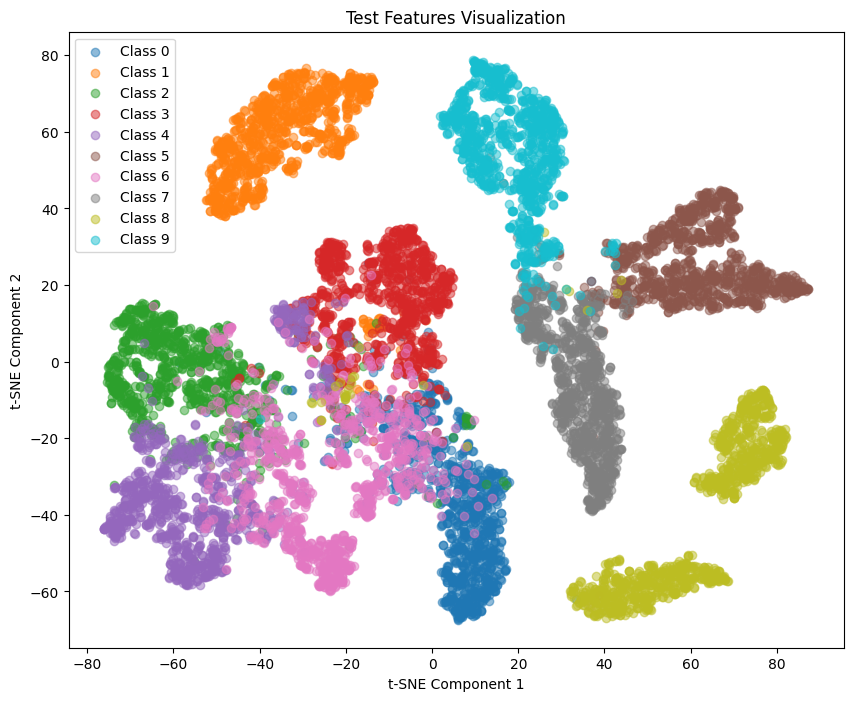

In [ ]:
#Import the Necessary Libraries and Modules - Using Pytorch, Sklearn, Numpy
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
from sklearn.manifold import TSNE

# Step 1: Define the transformation to normalize the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images
])

# Step 2: Download the Fashion_MNIST dataset - Pytorch
dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Step 3: Calculate the lengths for training and validation sets (80% training, 20% validation)
train_length = int(0.8 * len(dataset))
val_length = len(dataset) - train_length

# Step 4: Split the dataset
train_dataset, val_dataset = random_split(dataset, [train_length, val_length])

# Step 5: Create DataLoaders for each set
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 6: Check the dataset sizes
print(f'Training set size: {len(train_dataset)}')  # Should be 80% of 60,000
print(f'Validation set size: {len(val_dataset)}')  # Should be 20% of 60,000
print(f'Test set size: {len(test_dataset)}')       # Should be 10,000

# Step 7: Plot some training images
def plot_training_images(loader, num_images=10):
    images, labels = next(iter(loader))
    images = images[:num_images]
    labels = labels[:num_images]

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f'Label: {labels[i].item()}')
        plt.axis('off')
    plt.show()

plot_training_images(train_loader)

# Step 8: Define the CNN model - 5 layers followed by ReLU and maxpooling
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout25 = nn.Dropout(0.25)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.dropout50 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

        # Initialize weights using He initialization
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout25(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(F.relu(self.conv5(x)))
        x = x.view(-1, 128 * 3 * 3)  # Flatten the tensor
        features = F.relu(self.fc1(x))
        x = self.dropout50(features)
        x = self.fc2(x)
        return x, features

# Step 9: Instantiate the model, define the criterion and optimizer
cnn_model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-5)  # Using Adam with L2 regularization

# Step 10: Define the training function for the CNN model
def train_cnn(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        train_loss = 0
        train_acc = 0
        for batch in train_loader:
            images, labels = batch
            optimizer.zero_grad()  # Clear previous gradients
            outputs, _ = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            train_loss += loss.item()
            train_acc += (outputs.argmax(1) == labels).float().mean().item()

        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        val_loss = 0
        val_acc = 0
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            for batch in val_loader:
                images, labels = batch
                outputs, _ = model(images)  # Forward pass
                loss = criterion(outputs, labels)  # Calculate loss
                val_loss += loss.item()
                val_acc += (outputs.argmax(1) == labels).float().mean().item()

        val_loss /= len(val_loader)
        val_acc /= len(val_loader)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

# Step 11: Plotting function
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'r', label='Training loss')
    plt.plot(epochs, val_losses, 'b', label='Validation loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'r', label='Training accuracy')
    plt.plot(epochs, val_accuracies, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Step 12: Train the CNN model
train_losses, val_losses, train_accuracies, val_accuracies = train_cnn(cnn_model, train_loader, val_loader, criterion, optimizer, epochs=20)

# Step 13: Plot metrics
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Step 14: Evaluate the model on the test dataset
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    test_acc = 0
    all_preds = []
    all_labels = []
    all_features = []

    with torch.no_grad():
        for batch in test_loader:
            images, labels = batch
            outputs, features = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            test_loss += loss.item()
            test_acc += (outputs.argmax(1) == labels).float().mean().item()
            all_preds.extend(outputs.argmax(1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_features.append(features.cpu().numpy())

    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
    all_features = np.concatenate(all_features, axis=0)
    return test_loss, test_acc, all_preds, all_labels, all_features

test_loss, test_acc, y_pred_test, y_true_test, test_features = evaluate_model(cnn_model, test_loader)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Step 15: Confusion Matrix
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
cm = confusion_matrix(y_true_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Step 16: Classification Report
print("Classification Report on Test Data:")
print(classification_report(y_true_test, y_pred_test, target_names=class_names))

# Step 17: Calculate percentage difference in accuracy
percentage_difference_accuracy = abs(np.mean(train_accuracies) - test_acc) / np.mean(train_accuracies) * 100
print(f'Percentage difference in accuracy between training and test data: {percentage_difference_accuracy:.2f}%')

# Step 18: Define the extract_features function
def extract_features(model, loader):
    model.eval()  # Set the model to evaluation mode
    features_list = []
    labels_list = []

    with torch.no_grad():
        for images, labels in loader:
            _, features = model(images)  # Forward pass to get features
            features_list.append(features)
            labels_list.append(labels)

    features = torch.cat(features_list, dim=0)
    labels = torch.cat(labels_list, dim=0)
    return features, labels

# Step 19: Save extracted features for use in MLP
train_features, train_labels = extract_features(cnn_model, train_loader)
val_features, val_labels = extract_features(cnn_model, val_loader)
test_features, test_labels = extract_features(cnn_model, test_loader)

torch.save((train_features, train_labels), 'train_features.pth')
torch.save((val_features, val_labels), 'val_features.pth')
torch.save((test_features, test_labels), 'test_features.pth')

# Step 20: Visualize extracted features using t-SNE
def visualize_features(features, labels, title='Features Visualization'):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_features = tsne.fit_transform(features)

    plt.figure(figsize=(10, 8))
    for i in range(10):
        idx = labels == i
        plt.scatter(reduced_features[idx, 0], reduced_features[idx, 1], label=f'Class {i}', alpha=0.5)
    plt.legend()
    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

print(f'Train features shape: {train_features.shape}')
print(f'Validation features shape: {val_features.shape}')
print(f'Test features shape: {test_features.shape}')

# Visualize the features extracted from the test dataset
visualize_features(test_features, test_labels.numpy(), title='Test Features Visualization')


# 3D the final one with the extracted features from the CNN -
Input the extractd features to the MLP module developed earlier accurcy acheived - 92% on the test data #3D Extracting Features for MLP:
Defined a function to extract features from the CNN model for each dataset.
Saved the extracted features for later use in an MLP model.
Visualizing the extracted Features: Use t-SNE to visualize the extracted features in a 2D plot, helping to understand the feature distribution.

Train features shape: torch.Size([48000, 128])
Validation features shape: torch.Size([12000, 128])
Test features shape: torch.Size([10000, 128])
Epoch 1, Training Loss: 0.6460, Validation Loss: 0.2570, Training Accuracy: 0.8836, Validation Accuracy: 0.9202
Epoch 2, Training Loss: 0.1204, Validation Loss: 0.2330, Training Accuracy: 0.9716, Validation Accuracy: 0.9210
Epoch 3, Training Loss: 0.0927, Validation Loss: 0.2351, Training Accuracy: 0.9730, Validation Accuracy: 0.9215
Epoch 4, Training Loss: 0.0829, Validation Loss: 0.2399, Training Accuracy: 0.9737, Validation Accuracy: 0.9222
Epoch 5, Training Loss: 0.0777, Validation Loss: 0.2442, Training Accuracy: 0.9740, Validation Accuracy: 0.9226
Epoch 6, Training Loss: 0.0745, Validation Loss: 0.2486, Training Accuracy: 0.9743, Validation Accuracy: 0.9216
Epoch 7, Training Loss: 0.0723, Validation Loss: 0.2516, Training Accuracy: 0.9746, Validation Accuracy: 0.9224
Epoch 8, Training Loss: 0.0707, Validation Loss: 0.2548, Training Accur

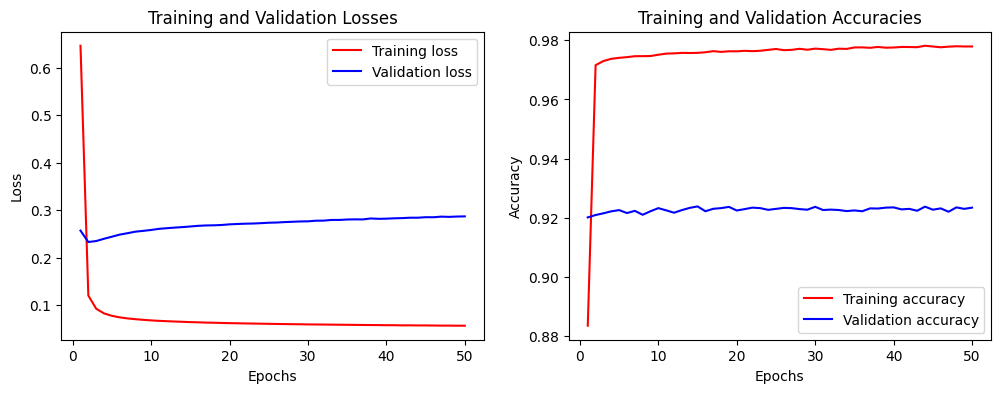

Test Loss: 0.3047, Test Accuracy: 0.9229


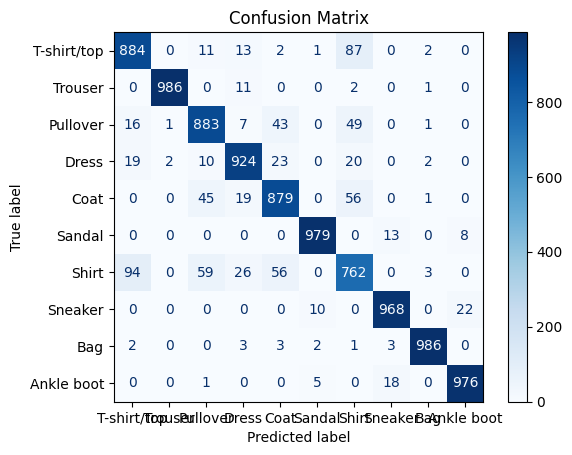

Classification Report on Test Data:
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.88      0.88      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.88      0.88      0.88      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.87      0.88      0.88      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.78      0.76      0.77      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.97      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Percentage difference in accuracy between training and test data: 5.30%
Percentage difference in accuracy between validation and test data: 0.01%


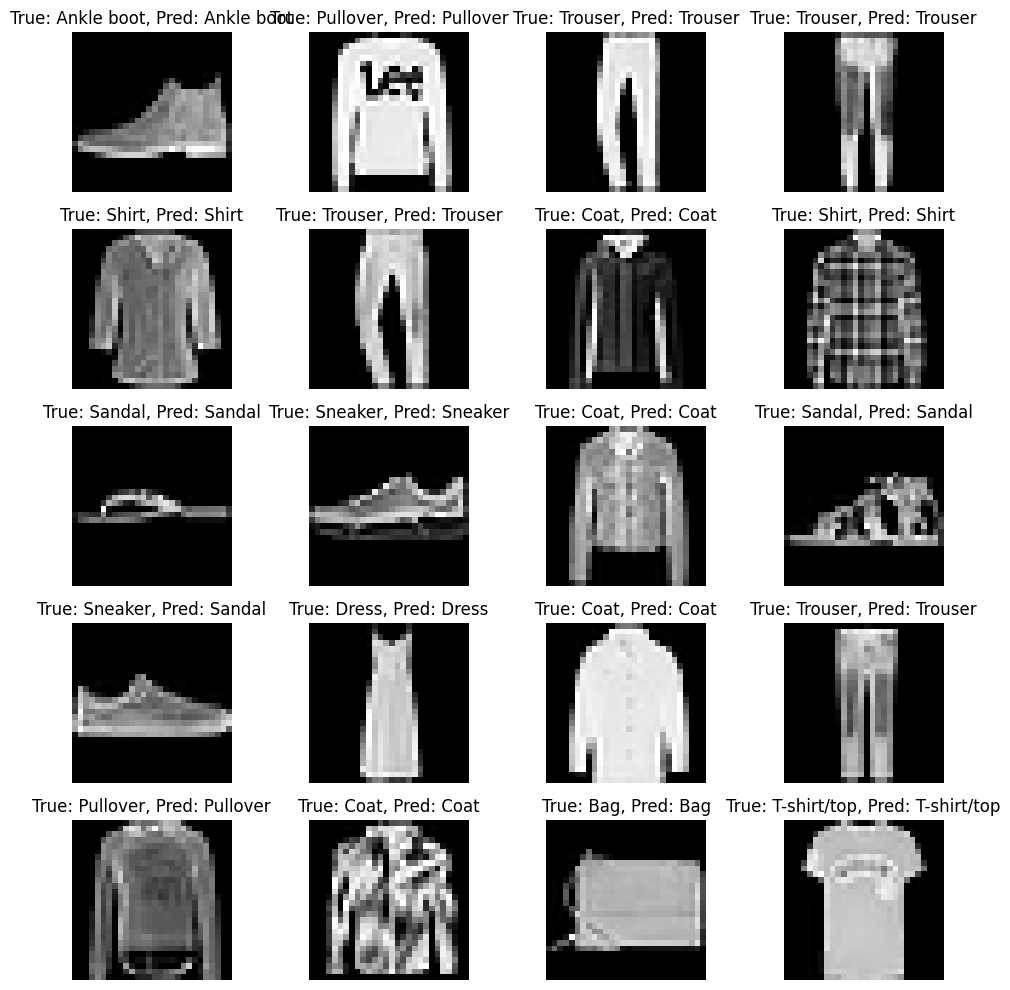

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load extracted features from CNN
train_features, train_labels = torch.load('train_features.pth')
val_features, val_labels = torch.load('val_features.pth')
test_features, test_labels = torch.load('test_features.pth')

# Print feature shapes
print(f'Train features shape: {train_features.shape}')
print(f'Validation features shape: {val_features.shape}')
print(f'Test features shape: {test_features.shape}')

# Create PyTorch DataLoaders for the extracted features
batch_size = 128
train_dataset = TensorDataset(train_features, train_labels)
val_dataset = TensorDataset(val_features, val_labels)
test_dataset = TensorDataset(test_features, test_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the MLP model
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def relu(self, Z):
        return np.maximum(0, Z)

    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return expZ / np.sum(expZ, axis=1, keepdims=True)

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        A2 = self.softmax(self.Z2)
        return A2

    def backward(self, X, y, output, learning_rate=0.01):
        m = y.shape[0]
        y_one_hot = np.eye(self.output_size)[y]

        dZ2 = output - y_one_hot
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * (self.Z1 > 0)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def compute_loss(self, output, y):
        m = y.shape[0]
        y_one_hot = np.eye(self.output_size)[y]
        log_probs = -np.log(output[range(m), y])
        loss = np.sum(log_probs) / m
        return loss

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

    def accuracy(self, predictions, labels):
        return np.mean(predictions == labels)

# Training function for the MLP model
def train_mlp(model, train_loader, val_loader, epochs=10, learning_rate=0.01):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        model_train_loss = 0
        model_train_acc = 0
        for batch in train_loader:
            images, labels = batch
            images = images.numpy()
            labels = labels.numpy()

            outputs = model.forward(images)
            loss = model.compute_loss(outputs, labels)
            model_train_loss += loss
            model_train_acc += model.accuracy(model.predict(images), labels)

            model.backward(images, labels, outputs, learning_rate)

        model_train_loss /= len(train_loader)
        model_train_acc /= len(train_loader)
        train_losses.append(model_train_loss)
        train_accuracies.append(model_train_acc)

        val_loss = 0
        val_acc = 0
        for batch in val_loader:
            images, labels = batch
            images = images.numpy()
            labels = labels.numpy()

            outputs = model.forward(images)
            loss = model.compute_loss(outputs, labels)
            val_loss += loss
            val_acc += model.accuracy(model.predict(images), labels)

        val_loss /= len(val_loader)
        val_acc /= len(val_loader)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f'Epoch {epoch+1}, Training Loss: {model_train_loss:.4f}, Validation Loss: {val_loss:.4f}, Training Accuracy: {model_train_acc:.4f}, Validation Accuracy: {val_acc:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

# Example usage
input_size = train_features.shape[1]
hidden_size = 128
output_size = 10
mlp_model = MLP(input_size, hidden_size, output_size)

train_losses, val_losses, train_accuracies, val_accuracies = train_mlp(mlp_model, train_loader, val_loader, epochs=50, learning_rate=0.01)

# Plotting the losses and accuracies
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'r', label='Training loss')
    plt.plot(epochs, val_losses, 'b', label='Validation loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'r', label='Training accuracy')
    plt.plot(epochs, val_accuracies, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Evaluate the MLP model on the test dataset
def evaluate_mlp(model, test_loader):
    test_loss = 0
    test_acc = 0
    all_preds = []
    all_labels = []

    for batch in test_loader:
        images, labels = batch
        images = images.numpy()
        labels = labels.numpy()

        outputs = model.forward(images)
        loss = model.compute_loss(outputs, labels)
        test_loss += loss
        test_acc += model.accuracy(model.predict(images), labels)
        all_preds.extend(model.predict(images))
        all_labels.extend(labels)

    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
    return test_loss, test_acc, all_preds, all_labels

test_loss, test_acc, y_pred_test, y_true_test = evaluate_mlp(mlp_model, test_loader)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Confusion Matrix
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
cm = confusion_matrix(y_true_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report on Test Data:")
print(classification_report(y_true_test, y_pred_test, target_names=class_names))

# Calculate percentage difference in accuracy
percentage_difference_train_test = abs(np.mean(train_accuracies) - test_acc) / np.mean(train_accuracies) * 100
percentage_difference_val_test = abs(np.mean(val_accuracies) - test_acc) / np.mean(val_accuracies) * 100
print(f'Percentage difference in accuracy between training and test data: {percentage_difference_train_test:.2f}%')
print(f'Percentage difference in accuracy between validation and test data: {percentage_difference_val_test:.2f}%')

# Visualize predictions using original images
def visualize_predictions(original_images, labels, features, model, num_images=20):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 4, i + 1)
        image = original_images[i].numpy().squeeze()  # Use original images for visualization
        feature = features[i].numpy()
        label = labels[i].item()
        prediction = model.predict(feature.reshape(1, -1))
        plt.imshow(image, cmap='gray')
        plt.title(f'True: {class_names[label]}, Pred: {class_names[prediction[0]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load original test images
test_dataset_original = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
original_test_images = [test_dataset_original[i][0] for i in range(20)]

# Visualize the predictions for the first 20 test images
visualize_predictions(original_test_images, test_labels, test_features, mlp_model)
